# Declaration of Originality

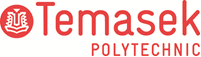

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Sharmyn Ho (2400847F)
* Tutorial Group                : P03
* Tutor						    : Mr Ruchir Srivastava
* Submission Date               : 11/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [121]:
## Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# 1. Business Understanding
### **Goal:**
To develop a supervised machine learning classification model that predicts whether a patient is at risk of stroke based on dmeographic and health-related factors.

---

### **Problem formulation:**
This project is formulated as a binary classification problem, where the model predicts whether a patient has experienced or is at risk of experiencing a stroke (stroke = 1) or not (stroke = 0). The prediction is based on patient attributes such as age, gender, medical conditions (e.g., hypertension and heart disease), lifestyle factors, and clinical measurements.
The intended application of this model is to support healthcare professionals and decision-makers by providing an additional data-driven tool for identifying high-risk patients, enabling earlier intervention and more targeted preventive strategies.

---

### **Background and motivation:**
Stroke is a major global health concern and one of the leading causes of death and long-term disability worldwide. According to the World Health Organisation (WHO), the lifetime risk of stroke has increased significantly over the past two decades, with an estimated 1 in 4 adults expected to experience a stroke in their lifetime.
Early identification of individuals at higher risk of stroke is critical for preventive healthcare. Many stroke risk factors, such as hypertension, high blood glucose levels, smoking habits, and body mass index, are measurable and potentially modifiable. This makes stroke risk assessment a suitable and impactful problem for supervised machine learning, where patterns in patient data can be used to support early risk screening and decision-making.

# 2. Data Understanding

## 2.1 Load dataset

In [122]:
## The dataset is loaded from a CSV file into a pandas DataFrame for exploration and preprocessing.
FILE_PATH = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2.2 Summary Statistics

### **2.2.1 Understand variable types**

In [123]:
## Understand the type of variable for each column
#Display column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Based on the dataset structure and data types, the variables can be grouped into numerical, categorical, and binary features. Understanding the variable types is important because numerical, categorical, and binary features require different preprocessing techniques, which directly affects model performance and interpretation.

**Numerical variables** include:
- `age`
- `avg_glucose_level`
- `bmi`

These variables represent continuous patient measurements and may contain a wide range of values and potential outliers.

---

**Categorical variables** include:
- `gender`
- `ever_married`
- `work_type`
- `Residence_type`
- `smoking_status`

These variables describe demographic and lifestyle characteristics and are stored as object data types.

---

**Binary variables** include:
- `hypertension`
- `heart_disease`
- `stroke` (target variable)

These variables take values of 0 or 1 to indicate the absence or presence of a medical condition and binary variables can be used directly by classification models without additional encoding.

---

The `id` column serves as a unique identifier for each patient and does not contain predictive information. It is retained at this stage for data understanding but I will remove it later on during data preparation.

### **2.2.2 Check for missing data**

In [124]:
## Check for missing data in each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

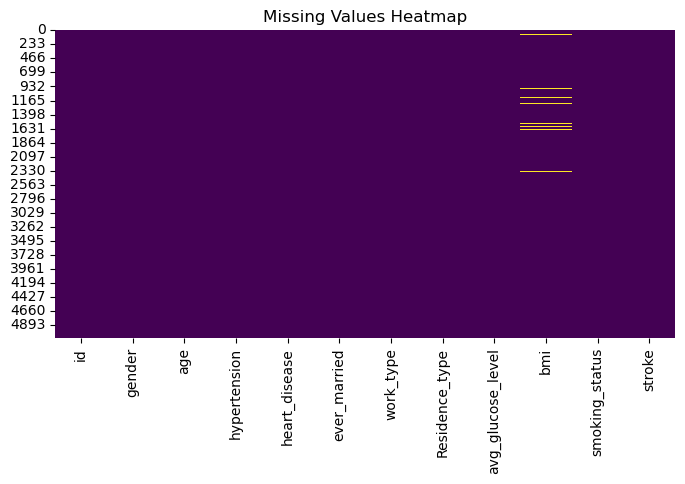

In [125]:
# Visualise missing values
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

The above inspection of missing values shows that the dataset is largely complete, with the exception of the `bmi` attribute, which contains 201 missing entries. All other variables, including the target variable `stroke`, have no missing values.

The missing values in `bmi` are visualised in the heatmap as shown above, where gaps appear only along the BMI column, confirming that missingness is isolated to this feature.

In a healthcare context, missing clinical measurements such as BMI may not be randomly distributed and could be associated with specific patient groups or conditions. Removing rows with missing BMI values may therefore reduce the dataset size and potentially discard important stroke-positive cases, further worsening the existing class imbalance on my target variable `stroke`.

As a result, I have noted the presence of missing BMI values at this stage and I handle it carefully later on during the data preparation phase to minimise information loss and avoid introducing bias into the model.

### **2.2.3 Data distribution (numerical features)**

In [126]:
# Summary statistics for numerical variables
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The summary statistics above provide an overview of the numerical features in the dataset, including age, average glucose level, and body mass index (BMI).

The `age` variable spans a wide range, from infancy to older adulthood, with a mean age of approximately 43 years. This broad distribution suggests that stroke risk may vary significantly across different age groups, highlighting age as a potentially important predictive feature.

The `avg_glucose_level` variable shows substantial variability, with values ranging from approximately 55 to over 270. The large spread and high maximum value indicate the presence of possible outliers and suggest a right-skewed distribution, which may influence certain models that are sensitive to extreme values.

Similarly, the `bmi` variable exhibits a wide range, from 10.3 to 97.6, with noticeable variability across patients. Such dispersion suggests that BMI may contain outliers and non-uniform distributions that require further visual examination.

These observations indicate that visual exploration of numerical feature distributions is necessary to better understand their shape, detect outliers, and assess their relationship with the target variable, which I will later address in my subsequent exploratory data analysis section below.

### **2.2.5 Categorical values overview**

In [127]:
# Check unique values for categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


gender value counts:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married value counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type value counts:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type value counts:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status value counts:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


I examined the categorical variables shown above and notice that most categories are unevenly distributed. The above show that a small number of categories account for the majority of the records, while some categories appear only in a very small number of cases.

For example, the `gender` variable contains a rare category (`Other`) with only a single occurrence. Similarly, the `work_type` variable includes the category `Never_worked`, which appears in a very small number of records compared to other work types. These rare categories may have limited predictive power on their own and could introduce noise if handled improperly.

In addition, the `smoking_status` variable includes an `Unknown` category, which represents unavailable information and may account for a noticeable proportion of the dataset and therefore it cannot be ignored without careful consideration.

If i blindly remove any rows containing rare categories or unknown values it could disproportionately reduce the dataset size and potentially eliminate stroke-positive cases, further worsening the existing class imbalance. As a result, I have noted these categorical distributions at this stage and I will need to be careful when handling this during data preparation through one-hot encoding or grouping strategies.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [128]:
# Distribution of target variable
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

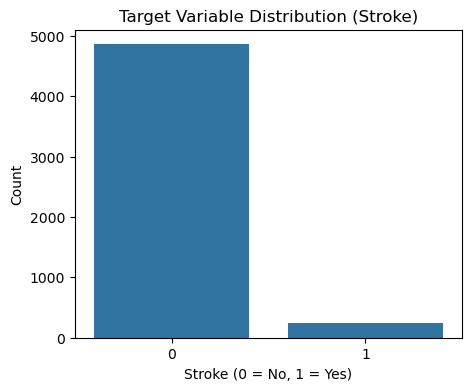

In [129]:
## Data distribution visualisation
plt.figure(figsize=(5, 4))
sns.countplot(x='stroke', data=df)
plt.title("Target Variable Distribution (Stroke)")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

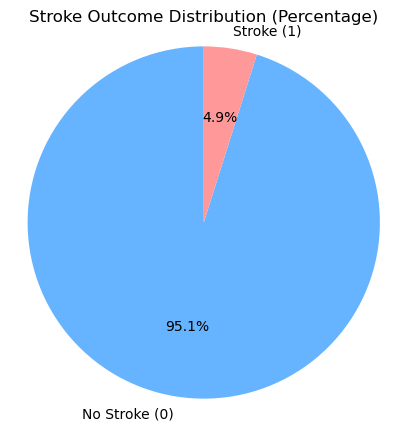

In [130]:
stroke_counts = df['stroke'].value_counts().sort_index()

plt.figure(figsize=(5, 5))
plt.pie(
    stroke_counts,
    labels=['No Stroke (0)', 'Stroke (1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
plt.title("Stroke Outcome Distribution (Percentage)")
plt.axis('equal')
plt.show()

The distribution of the target variable `stroke` shows a strong class imbalance, with out of 5,110 records, only 249 patients experienced a stroke at 4.9%(`stroke = 1`), while 4,861 patients did not at 95.1%(`stroke = 0`), this indicates that stroke cases account for less than 5% of the dataset.

The count plot above further illustrates this imbalance, with non-stroke cases significantly outnumbering stroke cases, such imbalance is common in healthcare datasets, where adverse medical events occur less frequently than normal outcomes.

The pie chart is used to visualise the percentage proportion of stroke vs non-stroke cases in the dataset. The chart highlights the severe class imbalance, with stroke cases representing only a small percentage of the total records at 4.9%, while non-stroke cases at 95.1%.

This class imbalance has important implications for my model evaluation later on, as metrics such as accuracy may be misleading, as a model can achieve high accuracy by predicting the majority class while failing to identify stroke cases. Therefore, I will need to consider task-appropriate evaluation metrics such as F1-score and recall in later stages to better assess my model’s ability to identify high-risk stroke patients.

### 2.3.1.2 Understanding distribution of features

## **Distribution of Numerical Features**

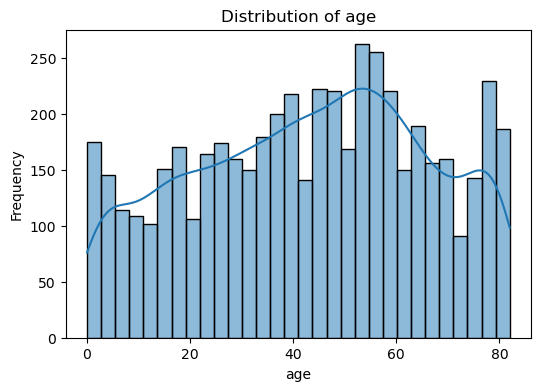

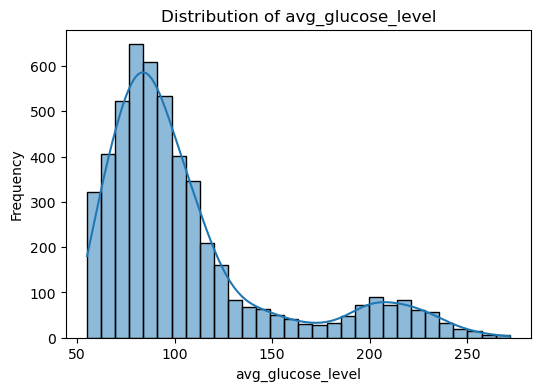

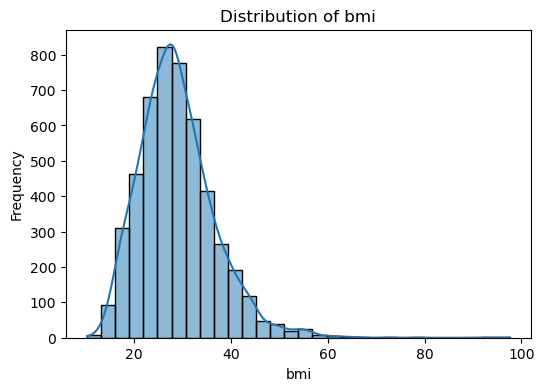

In [131]:
#Histogram
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Why histograms were used:**  
Histograms with a KDE curve are used to examine the **shape**, **spread**, and **skewness** of my numerical features, as well as to identify potential **outliers**. This helps inform later decisions on **feature scaling** and **model selection**.

---

**Age**  
The age distribution is **widely spread** across all age groups, with higher frequencies among middle-aged and older patients. The distribution is relatively **symmetric**, with no extreme outliers observed. This suggests that age is a stable numerical feature that can be used directly without transformation and is likely to be an important predictor of stroke risk.

---

**Average Glucose Level**  
The distribution of average glucose level is **right-skewed**, with most values concentrated at lower levels and a **long right tail** extending toward very high values. The presence of extreme glucose values indicates **outliers**, causing the **mean to be higher than the median**. Such skewness may affect linear models, suggesting that **scaling** or the use of **robust or tree-based models** may be more appropriate.

---

**Body Mass Index (BMI)**  
BMI also exhibits a **right-skewed distribution**, with the majority of values within the normal to overweight range and a **long right tail** representing extremely high BMI values. Similar to glucose, the skewness and outliers suggest that BMI may influence predictions unevenly. This reinforces the suitability of **tree-based models**, which are less sensitive to skewed distributions and extreme values.

---

**Summary**  
Overall, while age shows a relatively stable distribution, both glucose level and BMI display **right skewness and outliers**, which I need to consider during data preparation and model selection.

## **Distribution of Categorical Features**

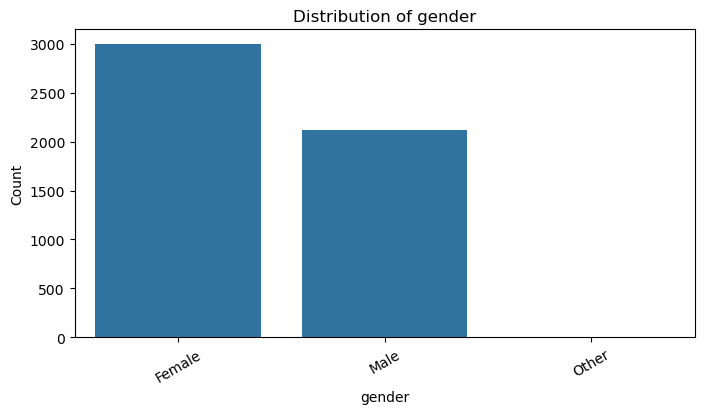

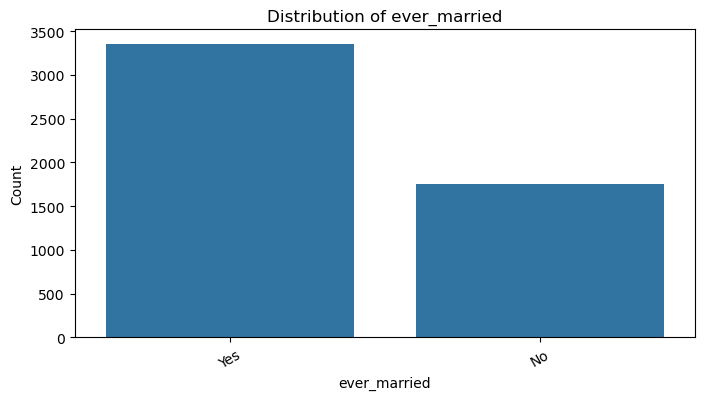

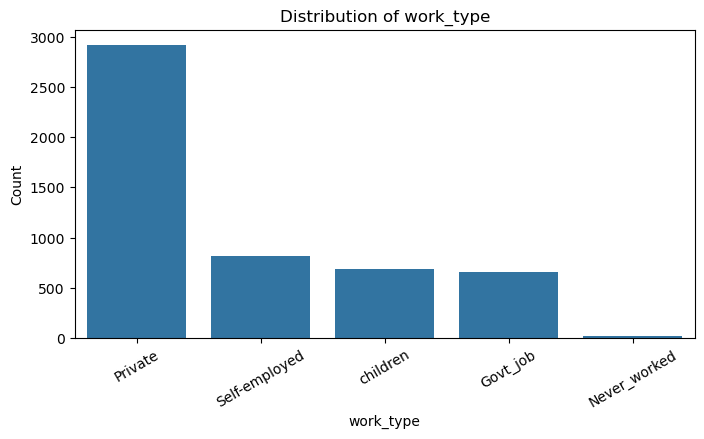

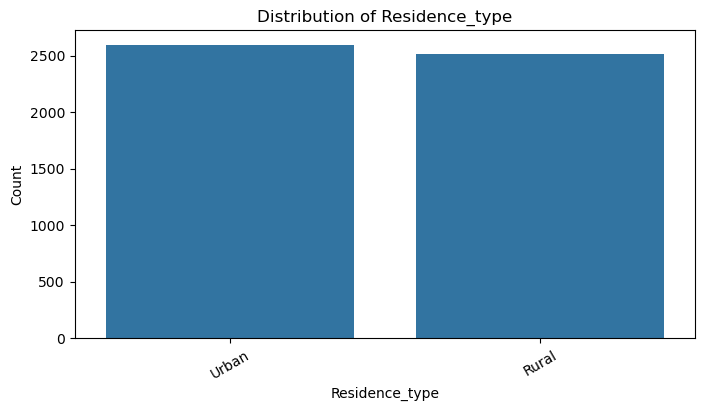

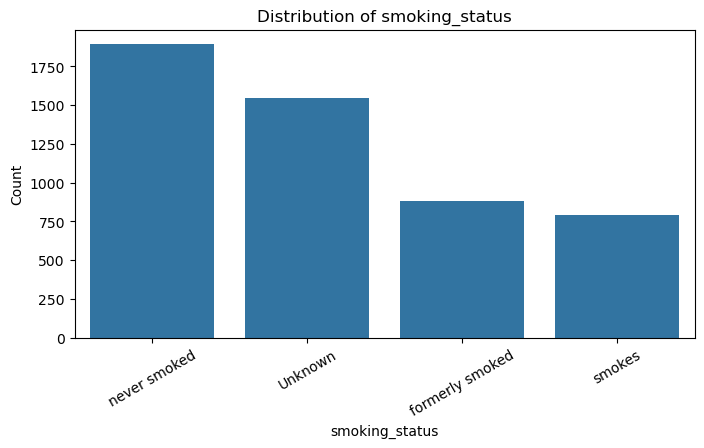

In [132]:
#Count plot
categorical_cols = [
    'gender', 'ever_married', 'work_type',
    'Residence_type', 'smoking_status'
]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(
        x=col,
        data=df,
        order=df[col].value_counts().index
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.show()

**Why count plots were used:**  
Count plots are used to visualise categorical features because they clearly show the **frequency of each category**, making it easy to identify **dominant groups**, **rare categories**, and the presence of **ambiguous values** such as `"Unknown"`. This information is critical for deciding how categories should be encoded or handled during data preparation.

---

**Gender**  
The gender distribution is dominated by *Female*, with *Female* having a slightly higher count at about 3000, which is about 900 more than *Male* at 2100. A very small number of records fall under the *Other* category, so such rare categories contribute minimal information and may introduce noise during modelling, suggesting that I need to carefully handle it during data cleaning later on.

---

**Ever Married**  
Most patients fall under the *Yes* category at about 3400, indicating that marital status is skewed toward one dominant group. While this imbalance does not invalidate the feature, it may affect how informative the variable is for classification and should be interpreted cautiously.

---

**Work Type**  
The *Private* category dominates at about 2900, followed by *Self-employed* and *children* both categories are similar at about 750. The presence of the *children* category however, suggests that it may be referring to younger individuals rather than working adults, which I would need to further analyse later. Lastly, rare categories such as *Never_worked* at about less than 100 appear infrequently and may contribute limited predictive value.

---

**Residence Type**  
The distribution between *Urban* and *Rural* residence types is relatively balanced at about 2600 and 2500 respectively. This suggests that residence type is unlikely to be biased toward a single group and may serve as a stable categorical feature.

---

**Smoking Status**  
Smoking status shows multiple categories with *Never smoked* being the most common at about 1770. Notably, a substantial number of records fall under the *Unknown* category. Since this group may include both stroke-positive and non-stroke cases, removing these records without further analysis could result in **information loss** and worsen class imbalance, so I have to further investigate the *Unkown* category before deciding how to handle it during data cleaning.

---

**Summary**  
Overall, the categorical feature distributions highlight the presence of **dominant categories**, **rare groups**, and **ambiguous values**. These observations will inform later preprocessing decisions, including category encoding, grouping, or selective removal, to ensure robust and meaningful model development.

## **Distribution of Binary Features**

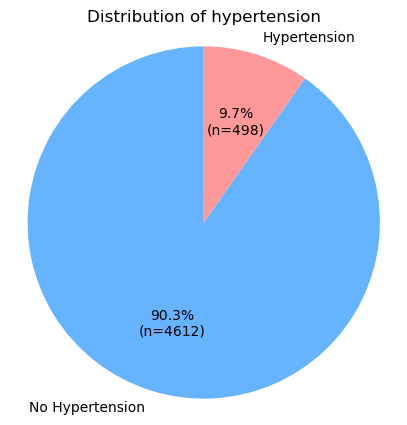

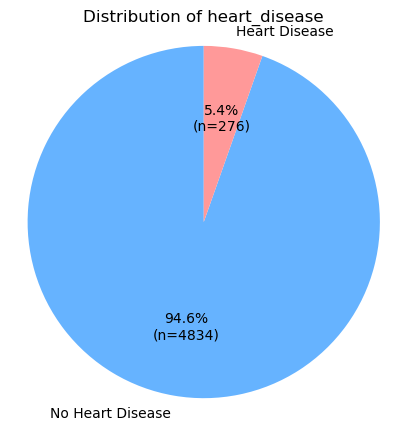

In [133]:
def plot_binary_pie(data, column, labels=('No', 'Yes')):
    counts = data[column].value_counts().sort_index()
    total = counts.sum()
    
    def autopct_format(pct):
        count = int(round(pct * total / 100))
        return f"{pct:.1f}%\n(n={count})"
    
    plt.figure(figsize=(5, 5))
    plt.pie(
        counts,
        labels=labels,
        autopct=autopct_format,
        startangle=90,
        colors=['#66b3ff', '#ff9999']
    )
    plt.title(f"Distribution of {column}")
    plt.axis('equal')
    plt.show()

plot_binary_pie(
    df,
    column='hypertension',
    labels=('No Hypertension', 'Hypertension')
)

plot_binary_pie(
    df,
    column='heart_disease',
    labels=('No Heart Disease', 'Heart Disease')
)

**Why pie charts were used:**  
Pie charts are suitable for binary features because they clearly show the **proportion of each class** relative to the whole dataset. This makes it easy to identify **rarity of positive cases**, which is especially important when assessing potential **class imbalance** before modelling.

---

**Hypertension**  
The majority of patients do not have hypertension, accounting for approximately **90.3%** of the dataset, while only **9.7%** of patients are recorded as having hypertension. This indicates that hypertension is a relatively rare condition in the dataset, despite being a clinically important risk factor for stroke.

---

**Heart Disease**  
Similarly, heart disease is present in only **5.4%** of patients, with **94.6%** having no recorded heart disease, this strong imbalance highlights the scarcity of positive cases for this feature.

---

**Implications for modelling**  
The rarity of positive cases for both hypertension and heart disease suggests that models trained on this dataset may become biased toward predicting the majority class. This reinforces the need for **imbalance-aware modelling strategies**, such as appropriate evaluation metrics, class weighting, or robust algorithms, to ensure that high-risk cases are not overlooked during prediction.

### 2.3.2 Understanding relationship between variables

## **Numerical Features VS Target**

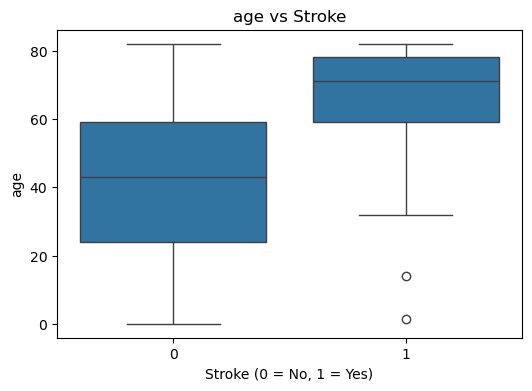

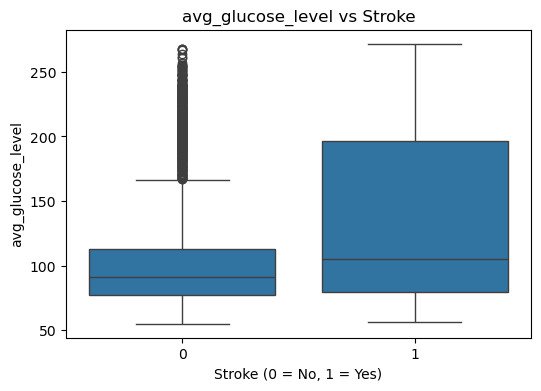

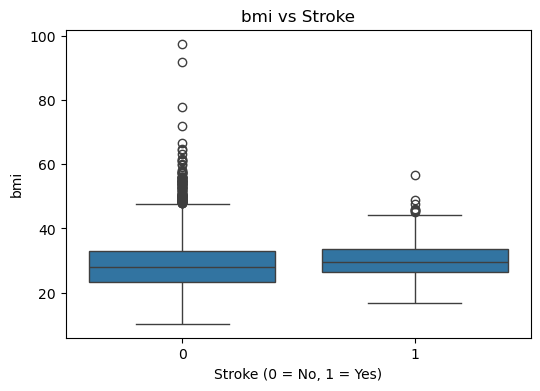

In [134]:
#box plot
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f"{col} vs Stroke")
    plt.xlabel("Stroke (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()

### Relationship Between Numerical Features and Stroke

**Why boxplots were used:**  
Boxplots are well-suited for comparing numerical features across categories because they highlight **median differences**, **spread (IQR)**, and **outliers** between stroke and non-stroke groups. This makes them ideal for assessing whether a feature shows meaningful separation with respect to the target variable.

---

**Age vs Stroke**  
Patients who experienced a stroke show a **substantially higher median age at about 70** compared to non-stroke patientst about 45. The stroke group is concentrated at older ages, with less overlap around the median, indicating a strong relationship between age and stroke risk, this suggests age is a **key predictive feature**.

---

**Average Glucose Level vs Stroke**  
The stroke group exhibits a **higher median glucose level** at about 90 and a **wider spread**, with numerous **high-end outliers**. This indicates greater variability and elevated glucose levels among stroke cases, the presence of extreme values suggests potential **non-linear effects** and supports the use of **robust or tree-based models**.

---

**BMI vs Stroke**  
BMI shows a **slightly higher median** for stroke cases, though there is considerable overlap between groups at about 30. Outliers are present in both classes, with more extreme values among non-stroke cases. While BMI alone may not strongly separate the classes, it may still contribute **incremental predictive value** when combined with other features.

---

**Summary**  
Overall, age demonstrates the **clearest separation** between stroke and non-stroke cases, while average glucose level shows **increased spread and outliers** among stroke patients, BMI shows weaker separation but remains relevant. These patterns inform **feature importance**, **model choice**, and the need to handle **outliers** appropriately during modelling.

## **Average Glucose Level Outliers**

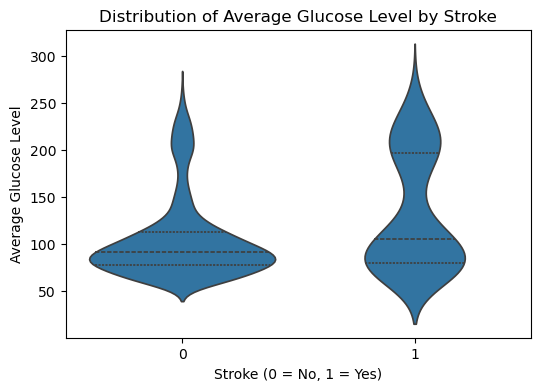

In [135]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='stroke', y='avg_glucose_level', data=df, inner='quartile')
plt.title("Distribution of Average Glucose Level by Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level")
plt.show()

In [136]:
df.groupby('stroke')['avg_glucose_level'].quantile([0.75, 0.90, 0.95, 0.99])

stroke      
0       0.75    112.8300
        0.90    183.8700
        0.95    213.5400
        0.99    239.2380
1       0.75    196.7100
        0.90    221.8100
        0.95    236.9020
        0.99    256.3132
Name: avg_glucose_level, dtype: float64

### Why further analysis was required:

The initial boxplot revealed a large number of extreme average glucose values, particularly among non-stroke cases. As glucose is a clinically significant risk factor, these values should not be removed blindly. Additional visualisations were therefore used to determine whether these extremes represent noise or meaningful risk patterns, and to guide appropriate preprocessing decisions.

---

**Why a violin plot was used:**

A violin plot displays the full distribution shape, density, and median simultaneously, making it well-suited for comparing how glucose levels differ between stroke and non-stroke groups.

**What this shows:**

Stroke cases have a higher median glucose level and a more pronounced upper density region, indicating that elevated glucose levels are more common among stroke-positive patients. However, the distributions overlap substantially, suggesting that glucose alone does not perfectly separate the two classes.

**Implication for modelling:**

Average glucose level is an informative but non-linearly distributed feature. The observed overlap indicates that tree-based or ensemble models may better capture its relationship with stroke risk than simple linear decision boundaries.

---

**Why quantile analysis was used:**

Quantiles provide a precise view of tail behaviour, helping assess how extreme the highest glucose values are and whether they are associated with stroke.

**What this shows:**

Stroke cases dominate the upper quantiles, particularly beyond the 75th percentile, with the top 5–1% glucose values consistently higher for stroke-positive patients. This indicates that extreme values are informative rather than random noise.

**Implication for preprocessing:**

Complete removal of outliers is not appropriate. Instead, outlier capping (winsorisation) at a high percentile (e.g. 99th percentile) can reduce model sensitivity to extreme values while preserving stroke-related risk signals.

---

**Summary:**

Based on the combined visual and quantile evidence, average glucose level will be retained as a key feature, with outlier capping applied during data preparation rather than removal.

## **Categorical Features VS Target**

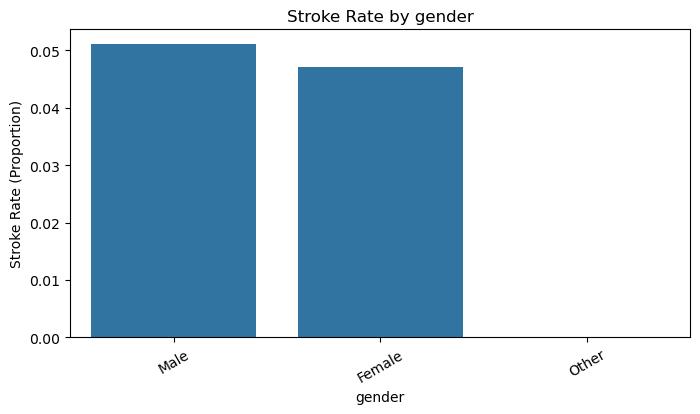

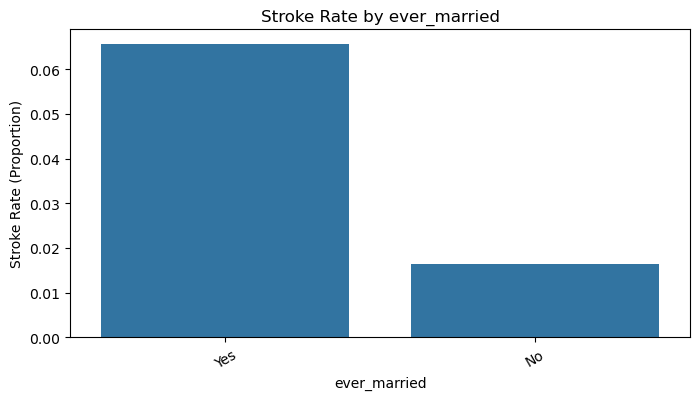

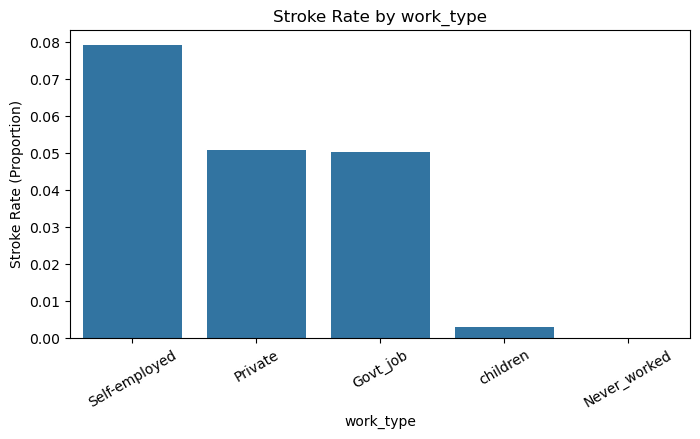

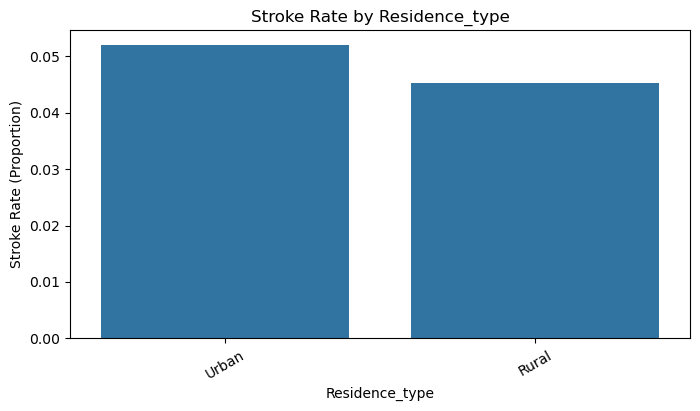

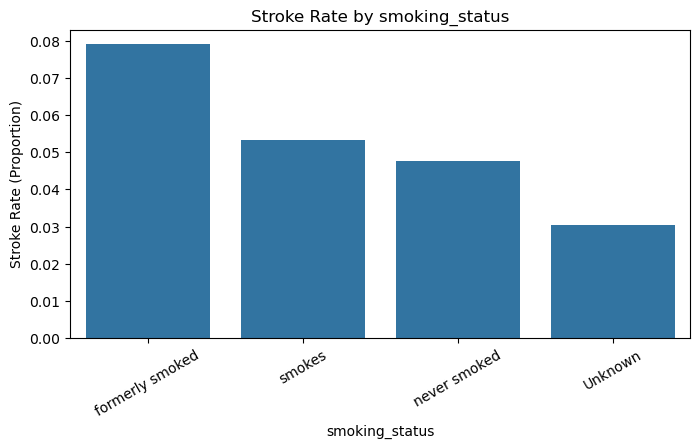

In [137]:
for col in categorical_cols:
    stroke_rate = (
        df.groupby(col)['stroke']
          .mean()
          .sort_values(ascending=False)
          .reset_index()
          .rename(columns={'stroke': 'stroke_rate'})
    )

    plt.figure(figsize=(8, 4))
    sns.barplot(data=stroke_rate, x=col, y='stroke_rate')
    plt.title(f"Stroke Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Stroke Rate (Proportion)")
    plt.xticks(rotation=30)
    plt.show()

### Relationship Between Categorical Features and Stroke

**Why stroke-rate bar plots were used:**  
For categorical features, raw counts can be misleading due to the **class imbalance** in the target variable. Stroke-rate bar plots show the **proportion of stroke cases within each category**, allowing clearer comparison of **relative stroke risk** across groups and helping identify informative predictors.

---

**Gender**  
Male patients exhibit a slightly higher stroke rate (**~0.055**) compared to female patients (**~0.048**). The difference is modest, suggesting that gender alone may have **limited predictive power**, though it may still contribute as a supporting feature. The *Other* category appears extremely rarely and provides insufficient information for reliable modelling, which meant that removing it during data cleaning would not affect much.

---

**Ever Married**  
Patients who have ever been married show a substantially higher stroke rate (**~0.065**) compared to those who have not (**~0.017**). This strong contrast suggests that marital status may act as a **proxy for age or life stage**, making it a potentially informative feature when combined with other variables.

---

**Work Type**  
Stroke rates vary notably across work types. *Self-employed* individuals show the highest stroke rate (**~0.078**), followed by *Private* (**~0.050**) and *Govt_job* (**~0.050**). In contrast, the *children* category has an extremely low stroke rate (**~0.003**), raising questions about whether this category represents young individuals rather than working adults. The *Never_worked* category shows no stroke cases, likely due to its very small sample size. These patterns suggest that work type contains **meaningful risk variation**, but certain categories may require careful interpretation or grouping.

---

**Residence Type**  
Urban residents exhibit a slightly higher stroke rate (**~0.052**) compared to rural residents (**~0.045**). The difference is small, indicating that residence type may have **limited standalone predictive value**, though it may still contribute marginally in combination with other features.

---

**Smoking Status**  
Patients who *formerly smoked* have the highest observed stroke rate (**~0.078**), followed by *smokes* (**~0.054**) and *never smoked* (**~0.046**). The *Unknown* category shows a lower but non-negligible stroke rate (**~0.032**), indicating that this group includes both stroke and non-stroke cases. This suggests that blindly removing *Unknown* values could lead to **information loss** and should be handled carefully during data preparation.

---

**Summary**  
Overall, categorical features such as **ever_married**, **work_type**, and **smoking_status** show meaningful variation in stroke risk across categories, indicating that they may serve as **informative predictors**. However, the presence of rare or ambiguous categories highlights the need for **careful encoding and grouping** during preprocessing.

## **Multivariate Correlation Heatmap for Numerical, Binary Features and Target**

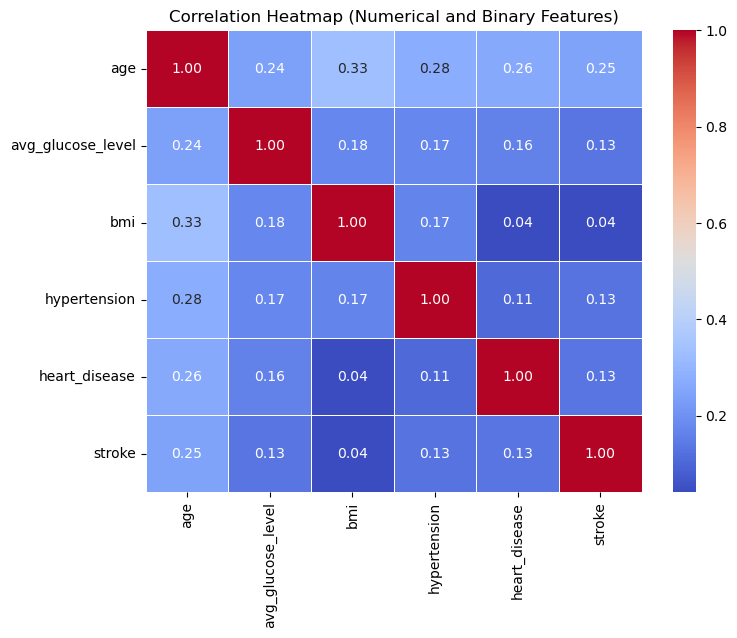

In [138]:
corr_cols = [
    'age', 'avg_glucose_level', 'bmi',
    'hypertension', 'heart_disease', 'stroke'
]

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, annot=True, fmt=".2f",
    cmap="coolwarm", linewidths=0.5
)
plt.title("Correlation Heatmap (Numerical and Binary Features)")
plt.show()

**Why a correlation heatmap was used:**  
A correlation heatmap provides a compact multivariate view of the **linear relationships** between numerical and binary features, including the target variable. It helps identify **feature relevance**, detect potential **multicollinearity**, and assess whether linear associations exist that may influence model choice.

---

**Key observations**

- **Age** shows the strongest correlation with stroke (**r ≈ 0.25**), indicating a moderate positive relationship and reinforcing its importance as a key predictive feature.
- **Average glucose level**, **hypertension**, and **heart disease** each exhibit weaker positive correlations with stroke (**r ≈ 0.13**), suggesting they contribute to stroke risk but likely in combination with other features.
- **BMI** shows a very weak correlation with stroke (**r ≈ 0.04**), implying that its relationship with stroke may be **non-linear** or dependent on interactions with other variables.
- Correlations among my features are generally low to moderate (all |r| < 0.35), indicating **no strong multicollinearity** issues.

---

**Implications for modelling**

The absence of strong linear correlations suggests that stroke risk is influenced by **multiple interacting factors** rather than a single dominant variable. This supports the use of **non-linear or tree-based models**, which can better capture complex relationships, while also indicating that feature removal based solely on multicollinearity is unnecessary.

## **Pairplot for Numerical Features VS Target**

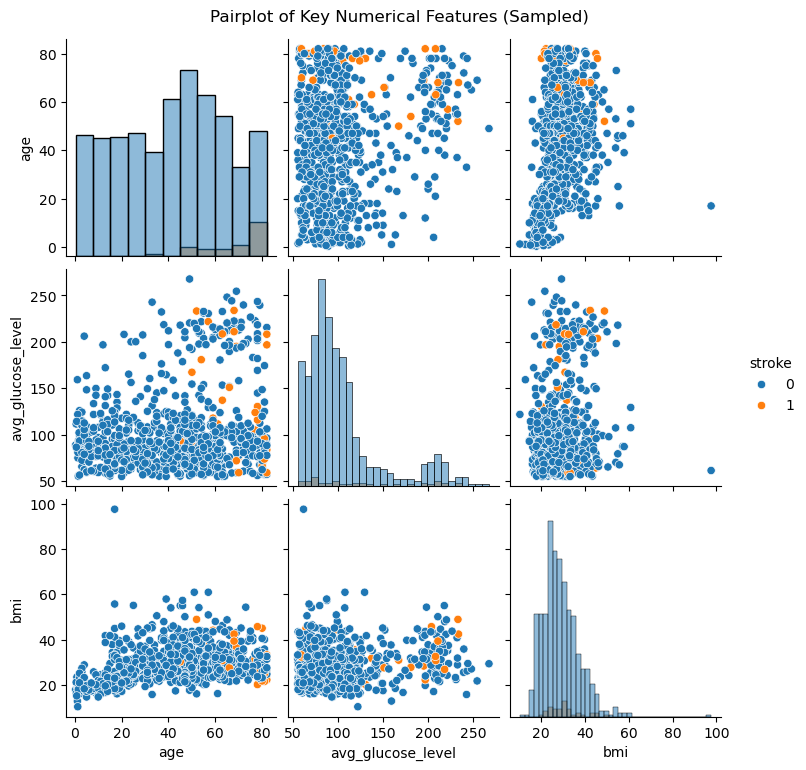

In [139]:
pair_cols = ['age', 'avg_glucose_level', 'bmi', 'stroke']

df_sample = (
    df[pair_cols]
    .dropna()
    .sample(n=800, random_state=42)
)

sns.pairplot(df_sample, hue='stroke', diag_kind='hist')
plt.suptitle(
    "Pairplot of Key Numerical Features (Sampled)",
    y=1.02
)
plt.show()

**Why a pairplot was used:**  
A pairplot provides a multivariate visualisation that allows simultaneous examination of **pairwise relationships** between numerical features while distinguishing stroke and non-stroke cases. It is particularly useful for assessing **visual class separation**, detecting potential **interactions**, and confirming the overall **complexity of the classification problem**. I also applied sampliing to improve clarity and computational efficiency without altering the underlying data patterns.

---

**Key observations**

- Stroke and non-stroke cases show **substantial overlap** across all feature pairs, indicating that no single numerical feature can clearly separate the two classes.
- Stroke cases tend to appear more frequently at **older ages** and **higher glucose levels**, but these patterns are **not linearly separable**.
- BMI shows limited visual separation between classes, suggesting that its relationship with stroke may be **weak or interaction-based** rather than directly predictive.
- The scattered and overlapping distributions across feature pairs highlight the presence of **non-linear relationships** and potential feature interactions.

---

**Implications for modelling**

The lack of clear visual separation confirms that stroke risk prediction is a **complex, multivariate problem**. This supports the use of **non-linear and ensemble models**, such as decision trees and random forests, which can capture interactions and non-linear effects that simpler linear models may fail to model effectively.

## **Scatter Plot for Age VS Average Glucose Level (Coloured by Stroke)**

In [140]:
fig = px.scatter(
    df[['age', 'avg_glucose_level', 'stroke']].dropna(),
    x='age',
    y='avg_glucose_level',
    color='stroke',
    title="Age vs Average Glucose Level (Coloured by Stroke)"
)
fig.show()

**Why a scatter plot was used:**  
A scatter plot is well-suited for visualising the relationship between **two continuous numerical variables** while simultaneously incorporating the **target variable** through colour encoding. Using an interactive scatter plot allows clearer inspection of individual observations, overlap between classes, and potential interaction effects between age and glucose level in relation to stroke occurrence.

---

**Key observations**

- Stroke cases are more frequently observed among individuals with **higher age** and **elevated average glucose levels**, particularly in the upper-right region of the plot.
- Despite this trend, there is **substantial overlap** between stroke and non-stroke cases across most of the feature space, indicating that neither age nor glucose level alone is sufficient to clearly distinguish stroke outcomes.
- The dispersion of stroke-positive points across a wide range of values suggests a **non-linear and interaction-based relationship** between age and glucose level.

---

**Implications for modelling**

The absence of a clear linear boundary reinforces that stroke prediction is a **complex, multivariate problem**. This supports the use of **non-linear models or ensemble methods**, which are better equipped to capture interactions between age and glucose level that contribute jointly to stroke risk.

### 2.3.2.1 Further Analysis for Data Cleaning Decisions

## **Age Feature Integer VS Non-integer Data VS Target**

In [141]:
df['age_is_integer'] = df['age'].apply(lambda x: float(x).is_integer())

age_integer_counts = df['age_is_integer'].value_counts()

age_integer_counts

non_integer_age_table = pd.crosstab(
    df['age_is_integer'],
    df['stroke'],
    rownames=['Age is Integer'],
    colnames=['Stroke']
)

non_integer_age_table.index = ['Non-Integer Age', 'Integer Age']
non_integer_age_table.columns = ['No Stroke (0)', 'Stroke (1)']

non_integer_age_table.style \
    .set_caption("Stroke Distribution by Integer vs Non-Integer Age") \
    .background_gradient(cmap='Greens') \
    .set_properties(**{
        'font-size': '14pt',
        'text-align': 'center'
    })

,No Stroke (0),Stroke (1)
Non-Integer Age,114,1
Integer Age,4747,248


#### Non-Integer Age Values and Stroke Outcome

To further investigate the presence of non-integer age values, I created this table above to distinguish between **integer** and **non-integer** ages. A cross-tabulation with the target variable shows that among **non-integer age records**, there is only **1 stroke-positive case** compared to **114 non-stroke cases**, while the vast majority of stroke cases (**248 cases**) occur among patients with integer ages.

From a modelling perspective, retaining these records may introduce **noise** without meaningfully improving the model’s ability to detect stroke cases. As a result, these non-integer age records can be reasonably removed during data cleaning, with minimal impact on stroke-positive data and a slight reduction in majority-class samples.

## **Age Distribution and Stroke Count for Work Type = "Children"**

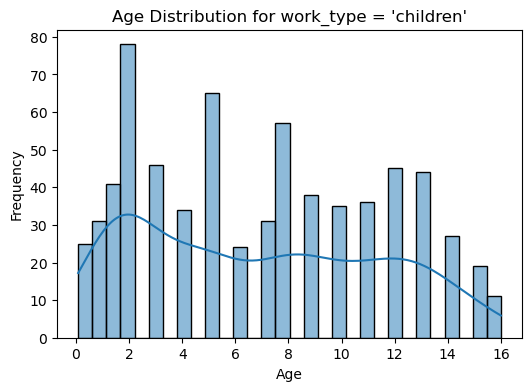

stroke
0    685
1      2
Name: count, dtype: int64

In [142]:
children_df = df[df['work_type'] == 'children'].copy()

children_df[['age', 'gender', 'ever_married', 'stroke']].head(20)

children_df['age'].describe()

plt.figure(figsize=(6, 4))
sns.histplot(children_df['age'], bins=30, kde=True)
plt.title("Age Distribution for work_type = 'children'")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

children_df['stroke'].value_counts()

#### Work Type = "children" and Age Distribution

To clarify the meaning of the `children` category in `work_type`, the age distribution of patients labelled as `children` was analysed. The results show that ages in this group range from **0 to 16 years**, confirming that this category represents **actual children**, rather than adults caring for children.

Further analysis of stroke outcomes within this group shows **685 non-stroke cases** and only **2 stroke-positive cases**, indicating that stroke occurrence among children in this dataset is **extremely rare**.

Since the project aims to classify **stroke risk**, which is predominantly relevant to **adult and elderly populations**, the `children` work type contributes very limited information for prediction. Retaining this group may further **increase class imbalance** while offering negligible benefit for identifying stroke cases.

Therefore, removing records where `work_type = "children"` is a justified data cleaning step that improves dataset relevance and slightly reduces the dominance of non-stroke cases, without materially reducing the number of stroke-positive samples.

---

#### Summary of Justification

Both non-integer age records and the `children` work type represent **young individuals with near-zero stroke incidence**. Removing these records is supported by exploratory analysis and helps improve dataset focus, reduce noise, and maintain modelling relevance for stroke risk prediction.

## **How many Work Type = "Never Worked" is Stroke VS Non-stroke**

In [143]:
df[df['work_type'] == 'Never_worked'].shape[0]

never_worked_stroke_counts = (
    df[df['work_type'] == 'Never_worked']['stroke']
    .value_counts()
)

never_worked_stroke_counts

stroke
0    22
Name: count, dtype: int64

### Handling Rare Categories in Work Type: `Never_worked`

Further analysis of the `Never_worked` category shows that it contains **22 records in total**, all of which correspond to **non-stroke cases** (`stroke = 0`). There are **no stroke-positive cases** within this category.

Due to its very small sample size and complete absence of stroke outcomes, the `Never_worked` category does not provide useful information for learning stroke-related patterns. Retaining this category would increase model complexity during categorical encoding while contributing **no predictive signal** for the minority class.

Since removing these records has **no impact on stroke-positive samples** and slightly reduces the number of majority-class observations, the `Never_worked` category can be safely removed during data preparation to improve dataset consistency and modelling stability.

## **BMI Feature Missing and Non-Missing Data VS Target**

In [144]:
df['bmi_missing'] = df['bmi'].isnull().astype(int)

bmi_missing_table = pd.crosstab(
    df['bmi_missing'],
    df['stroke'],
    rownames=['BMI Missing'],
    colnames=['Stroke']
)

bmi_missing_table.index = ['BMI Present', 'BMI Missing']
bmi_missing_table.columns = ['No Stroke (0)', 'Stroke (1)']

bmi_missing_table

,No Stroke (0),Stroke (1)
BMI Present,4700,209
BMI Missing,161,40


## **Distribution of BMI for Non-missing data**

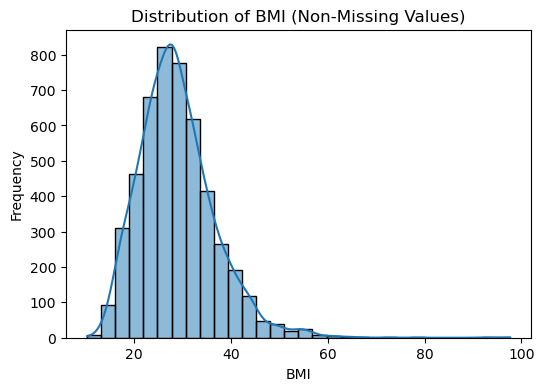

In [145]:
plt.figure(figsize=(6, 4))
sns.histplot(df['bmi'].dropna(), bins=30, kde=True)
plt.title("Distribution of BMI (Non-Missing Values)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

### Analysis of BMI Missing Values

Ater analysing the above tables, **40 out of 249 stroke-positive cases** have missing BMI values, representing approximately **16% of all stroke cases**. Hence, removing these records would therefore result in the loss of a substantial proportion of stroke-positive data and further worsen class imbalance.

The histogram of BMI values shows a **right-skewed distribution**, characterised by a long tail toward higher BMI values and the presence of extreme outliers. In such distributions, the **mean is pulled upward by extreme values**, making it an unreliable measure of central tendency. The **median**, which is less sensitive to skewness and outliers, provides a more representative value for typical BMI levels in the dataset.

Based on these observations, BMI missing values will be **retained** and handled through **median-based imputation** during data preparation. This approach preserves stroke-related information while reducing distortion caused by skewed data and extreme BMI values, supporting more robust and reliable model training.

## **Whether Gender = "Other" is Stroke or Non-stroke**

In [146]:
gender_other_table = df[df['gender'] == 'Other']['stroke'].value_counts()

gender_other_table

stroke
0    1
Name: count, dtype: int64

### Handling Rare Categories in Gender Feature

An examination of the `gender` feature shows that the *Other* category appears **only once** in the entire dataset. Further analysis reveals that this single record corresponds to a **non-stroke case**.

Due to its extremely low frequency, the *Other* category does not provide sufficient information for the model to learn meaningful patterns. Retaining such a rare category may introduce **noise** and complicate categorical encoding without contributing predictive value.

As this record does not contain a stroke-positive case, removing it has **no impact on the minority class** and does not worsen class imbalance. Therefore, the *Other* category will be removed during data preparation to improve data consistency and modelling stability.

## **How Many Smoking Status = "Unkown" is Stroke VS Non-stroke**

In [147]:
unknown_smoking_table = pd.crosstab(
    df[df['smoking_status'] == 'Unknown']['stroke'],
    columns='Count'
)

unknown_smoking_table.index = ['No Stroke (0)', 'Stroke (1)']

unknown_smoking_table

col_0,Count
No Stroke (0),1497
Stroke (1),47


### Handling Unknown Values in Smoking Status

An analysis of the `smoking_status = 'Unknown'` category shows that it contains **1,544 records**, including **47 stroke-positive cases** and **1,497 non-stroke cases**.

However, the *Unknown* category does not represent a meaningful or interpretable smoking behaviour. Unlike other categories (e.g. *never smoked*, *smokes*, *formerly smoked*), the *Unknown* label provides **no actionable information** about the patient’s lifestyle risk. As a result, the model cannot learn a clinically meaningful relationship between smoking behaviour and stroke risk from this category.

Retaining this category may introduce **noise** into the model, as the *Unknown* group likely contains a mix of patients with different true smoking habits. This can weaken the predictive signal of the smoking-related features and reduce model interpretability.

Removing the *Unknown* category reduces the dataset size while preserving the majority of stroke-positive cases (**200 out of 247 stroke cases remain**). Although this removal also slightly reduces class imbalance, the primary motivation is to improve **feature quality and interpretability**, rather than artificially balancing the dataset.

Therefore, records with `smoking_status = 'Unknown'` will be removed during data preparation to ensure that smoking-related features reflect **clear and meaningful behavioural categories**, supporting more reliable and interpretable model training.

# 3. Data Preparation

### Summary of What I Must Carry Out During Data Cleaning

Based on the exploratory data analysis and further investigation of feature distributions and target relationships, I need to apply the following data cleaning steps:

1. **Age (Non-Integer Values)**
   - Records with non-integer age values will be removed
   - These records represent very young individuals (e.g. infants), with only **1 stroke-positive case**, contributing minimal predictive value for stroke risk classification

2. **Work Type**
   - Records with `work_type = "children"` will be removed
     - Age analysis confirms these represent individuals aged **0–16**, with stroke cases being extremely rare (**2 cases**)
   - Records with `work_type = "Never_worked"` will be removed
     - This category contains **22 records**, all of which are non-stroke cases, providing no predictive signal

3. **BMI (Missing Values)**
   - BMI values with missing entries will be **retained**
   - Missing BMI will be imputed using **median-based imputation**, as BMI exhibits a **right-skewed distribution with outliers**, making the median more robust than the mean
   - This avoids removing **40 stroke-positive cases**, which would significantly impact class balance

4. **Average Glucose Level (Outliers)**
   - Extreme Glucose values will be retained but capped using winsorisation at a high quantile (e.g. 99th percentile)
   - Outlier capping reduces undue influence on sensitive mdoels while preserving clincally meaningful risk patterns

5. **Gender**
   - Records with `gender = "Other"` will be removed
   - This category appears only once and contains no stroke-positive cases, offering no meaningful information for modelling

6. **Smoking Status**
   - Records with `smoking_status = "Unknown"` will be removed
   - This category lacks interpretable behavioural meaning and introduces noise, while most stroke-positive cases are preserved after removal

7. **ID (Identifier Column)**
   - The id column will be removed
   - This column is a unique identifier and contains no predictive information related to stroke

8. **One-hot Encoding**
   - Remaining categorical features (`gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`) will be encoded using **one-hot encoding** to prepare the data for machine learning models

These steps aim to improve **data relevance**, **feature quality**, and **model stability**, while minimising information loss from stroke-positive cases.

## 3.1 Data Cleaning

In [148]:
##Make a working copy
df_clean = df.copy()

In [149]:
##Remove ID (identifier column) Point no.7
if 'id' in df_clean.columns:
    df_clean = df_clean.drop(columns=['id'])

In [150]:
##Remove non-integer age records Point no.1
df_clean['age_is_integer'] = df_clean['age'].apply(lambda x: float(x).is_integer())
df_clean = df_clean[df_clean['age_is_integer'] == True].drop(columns=['age_is_integer'])

In [151]:
##Remove gender = "Other" Point no.5
df_clean = df_clean[df_clean['gender'] != 'Other']

In [152]:
##Remove work_type = "Children" and "Never_worked" Point no.2
df_clean = df_clean[~df_clean['work_type'].isin(['children', 'Never_worked'])]

In [153]:
##Remove smoking_status = "Unknown" Point no.6
df_clean = df_clean[df_clean['smoking_status'] != 'Unknown']

In [154]:
##BMI median imputation Point no. 3
bmi_median = df_clean['bmi'].median()
df_clean['bmi'] = df_clean['bmi'].fillna(bmi_median)
df_clean = df_clean.drop(columns=['bmi_missing'])

### Data Cleaning for Point no. 4 and Point no. 8
   - Winsorisation (outlier capping) for avg_glucose_level will be computed only from Train set only, so I will do that below
   - One-hot encoding will happen after train/test split to prevent category leakage. I'll do split first, then get_dummies on train and align

## 3.2 Train-Test Split

In [155]:
##Define target (y) and features (x)
target_col = 'stroke'
y = df_clean[target_col].astype(int)
X = df_clean.drop(columns=[target_col])


In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [157]:
##Train/test split (stratisfied due to imbalance data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y  # preserves stroke ratio in both train and test splits
)

### Train–Test Split with Stratification

**Why stratification was used:**  
The dataset is **highly imbalanced**, with stroke-positive cases making up only a small proportion of the data. Using **stratified sampling** ensures that the **class distribution of the target variable (`stroke`) is preserved** in both the training and test sets.

---

**What stratification does:**  
Stratification forces the train–test split to maintain approximately the **same ratio of stroke (1) and non-stroke (0) cases** as in the original dataset. This prevents scenarios where one split contains disproportionately fewer stroke cases, which could lead to **biased model training or unreliable evaluation**.

---

**Why this matters for modelling:**  
Without stratification, the test set might contain too few stroke-positive cases, making performance metrics such as **recall, F1-score, and confusion matrix results unstable or misleading**. Stratification ensures a fair and representative evaluation of the model’s ability to detect stroke cases under real-world class imbalance conditions.

---

**Summary:**  
Stratified splitting improves **model reliability**, **evaluation validity**, and **reproducibility**, and is therefore essential when working with imbalanced classification problems such as stroke prediction.

In [158]:
##Apply winsorisation on avg_glucose_level using Train thresholds only
glucose_cap = X_train['avg_glucose_level'].quantile(0.99)

X_train['avg_glucose_level'] = X_train['avg_glucose_level'].clip(upper=glucose_cap)
X_test['avg_glucose_level']  = X_test['avg_glucose_level'].clip(upper=glucose_cap)

### Outlier Treatment Using Winsorisation (Average Glucose Level)

**What winsorisation is:**  
Winsorisation is an **outlier treatment technique** that limits extreme values by **capping them at a specified percentile**, rather than removing the observations entirely. This preserves all data points while reducing the disproportionate influence of extreme values on model training.

---

**Why winsorisation was applied:**  
Exploratory analysis showed that `avg_glucose_level` has a **right-skewed distribution** with **extreme high values**, particularly among non-stroke cases. Since glucose level is a clinically meaningful feature, removing these values would risk losing important health-related information.

---

**Why the 99th percentile was chosen:**  
Capping at the **99th percentile** limits only the most extreme 1% of glucose values, ensuring that:
- clinically relevant high glucose levels are retained
- only unusually extreme values are constrained
- the overall distribution remains representative of real-world data

---

**Why thresholds were learned from the training set only:**  
Winsorisation thresholds were computed **using the training set only** to prevent **data leakage**. Applying the same threshold to the test set ensures that evaluation remains fair and that the model does not gain information from the test data during preprocessing.

---

**Summary:**  
Winsorisation allows outlier control **without discarding data**, striking a balance between robustness and clinical relevance for glucose-related stroke risk prediction.

In [159]:
##One-hot encode my categorical variables using train columns only
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

X_train_enc = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_enc  = pd.get_dummies(X_test,  columns=categorical_cols, drop_first=True)

# Align columns so train and test have identical features
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

In [160]:
X_train_enc.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
3016,39.0,0,0,90.31,27.6,False,True,True,False,True,False,True
2654,52.0,0,0,67.50,27.7,True,True,False,False,True,False,True
305,43.0,0,0,146.01,31.5,True,True,True,False,True,False,True
2105,50.0,1,0,81.96,29.2,True,False,True,False,True,False,False
4873,39.0,0,0,84.09,31.1,True,True,True,False,False,False,False


In [161]:
# Create summary table for train/test split
split_summary = pd.DataFrame({
    "Dataset": ["Training Set", "Test Set"],
    "Number of Samples": [X_train.shape[0], X_test.shape[0]],
    "Number of Features": [X_train.shape[1], X_test.shape[1]],
    "No Stroke (0)": [
        y_train.value_counts()[0],
        y_test.value_counts()[0]
    ],
    "Stroke (1)": [
        y_train.value_counts()[1],
        y_test.value_counts()[1]
    ],
    "Stroke = 0 (%)": [
        y_train.value_counts(normalize=True)[0] * 100,
        y_test.value_counts(normalize=True)[0] * 100
    ],
    "Stroke = 1 (%)": [
        y_train.value_counts(normalize=True)[1] * 100,
        y_test.value_counts(normalize=True)[1] * 100
    ]
})

split_summary[["Stroke = 0 (%)", "Stroke = 1 (%)"]] = split_summary[
    ["Stroke = 0 (%)", "Stroke = 1 (%)"]
].round(2)

split_summary

,Dataset,Number of Samples,Number of Features,No Stroke (0),Stroke (1),Stroke = 0 (%),Stroke = 1 (%)
0,Training Set,2785,10,2623,162,94.18,5.82
1,Test Set,697,10,657,40,94.26,5.74


After data cleaning and one-hot encoding, I split my dataset into training and test sets using stratified sampling. Both sets contain the same number of features (10), and the stroke class distribution is highly consistent across splits.

Stroke-positive cases make up approximately **5–6%** of both the training and test sets, confirming that class imbalance was preserved and that the split is suitable for fair model evaluation.

# 4. Modelling

### 4.2 Train Model

In [162]:
## Initialise and train model (baseline + non-linear models)
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

import matplotlib.pyplot as plt
import seaborn as sns


In [163]:
##Evaluate model + return metrics
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """
    Fits model, evaluates on train/test, prints logs, and returns a dict of key metrics.
    Designed for imbalanced classification (stroke=1 is minority).
    """
    # Train
    model.fit(X_train, y_train)

    # Predict (class)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    # Predict probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
    else:
        y_prob_test = None

    # Metrics (focusing on minority class performance)
    metrics = {
        "Model": model_name,
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Test Precision (stroke=1)": precision_score(y_test, y_pred_test, pos_label=1, zero_division=0),
        "Test Recall (stroke=1)": recall_score(y_test, y_pred_test, pos_label=1, zero_division=0),
        "Test F1 (stroke=1)": f1_score(y_test, y_pred_test, pos_label=1, zero_division=0),
    }

    if y_prob_test is not None:
        metrics["Test ROC-AUC"] = roc_auc_score(y_test, y_prob_test)
    else:
        metrics["Test ROC-AUC"] = np.nan

    print("\n" + "="*60)
    print(f"{model_name} — Test Results")
    print("="*60)
    print("Confusion Matrix (raw):")
    print(confusion_matrix(y_test, y_pred_test))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test, digits=3, zero_division=0))

    return metrics, y_pred_test

## Rationale for Choosing These Models

To address the stroke risk classification problem, I selected three supervised learning models for baseline training: **Logistic Regression**, **Decision Tree**, and **Random Forest**. These models were chosen to provide **model diversity**, covering **linear**, **non-linear**, and **ensemble-based** approaches, and to allow meaningful comparison under the same dataset and evaluation conditions.

This dataset exhibits several challenging characteristics, including **class imbalance**, **non-linear relationships**, **skewed numerical features**, and **outliers**, as identified during exploratory data analysis. The selected models differ in how they handle these properties, making them suitable for comparative evaluation.

---

## Logistic Regression Model

**Why this model was chosen**

I selected Logistic Regression as a **linear baseline model** due to its simplicity, interpretability, and widespread use in **medical risk prediction**. It provides a transparent decision boundary and allows clear interpretation of feature influence on stroke risk.

As a baseline, it serves as a useful reference point to assess whether more complex models meaningfully improve performance.

In [164]:
##Logistic regression (Linear model)
log_reg = LogisticRegression(
    max_iter=2000,
    class_weight="balanced", #helps with imbalance
    random_state=42
)

logreg_metrics, logreg_pred = evaluate_model(
    log_reg, X_train_enc, y_train, X_test_enc, y_test,
    model_name="Logistic Regression (Linear Baseline)"
)


Logistic Regression (Linear Baseline) — Test Results
Confusion Matrix (raw):
[[474 183]
 [  7  33]]

Classification Report:
              precision    recall  f1-score   support

           0      0.985     0.721     0.833       657
           1      0.153     0.825     0.258        40

    accuracy                          0.727       697
   macro avg      0.569     0.773     0.545       697
weighted avg      0.938     0.727     0.800       697



**Qualitative interpretation of results**

Logistic Regression achieved **very high recall for stroke cases (0.825)**, indicating that it successfully identifies most stroke-positive patients. This makes it suitable as a **screening-oriented model**, where missing true stroke cases is costly.

However, this came at the expense of **very low precision (0.153)**, meaning a large number of **false positives** were generated. This reduces its practicality for deployment, as it may cause unnecessary concern or intervention.

Overall, Logistic Regression demonstrates that while linear models can capture some stroke-related patterns, they struggle to balance **precision and recall** in this imbalanced and non-linear dataset.

---

## Decision Tree Classifier Model

**Why this model was chosen**

I selected Decision Trees to introduce a **non-linear model** as it can capture **feature interactions** and handle **skewed distributions** without requiring scaling. Additionally, Decision Trees are highly **interpretable**, which is valuable in healthcare contexts.

In [165]:
##Decision tree (Non-linear model)
dt = DecisionTreeClassifier(
    max_depth=5,             # keep interpretable + avoid huge overfit
    min_samples_leaf=20,
    class_weight="balanced",
    random_state=42
)

dt_metrics, dt_pred = evaluate_model(
    dt, X_train_enc, y_train, X_test_enc, y_test,
    model_name="Decision Tree (Non-linear)"
)


Decision Tree (Non-linear) — Test Results
Confusion Matrix (raw):
[[457 200]
 [  7  33]]

Classification Report:
              precision    recall  f1-score   support

           0      0.985     0.696     0.815       657
           1      0.142     0.825     0.242        40

    accuracy                          0.703       697
   macro avg      0.563     0.760     0.529       697
weighted avg      0.937     0.703     0.782       697



**Qualitative interpretation of results**

The Decision Tree achieved performance similar to Logistic Regression in terms of recall but showed **lower overall accuracy (0.703)** and a **lower F1-score for stroke cases (0.242)**. Precision remained low, and false positives were still frequent.

Despite its interpretability, the Decision Tree did not offer meaningful improvement over the linear baseline, suggesting to me that a **single-tree structure** is insufficient to model the complexity of stroke risk patterns in the data.

---

## Random Forest Model

**Why this model was chosen**

I selected Random Forest as an **ensemble-based non-linear model** as it aggregates multiple decision trees to improve generalisation and reduce overfitting. It is well-suited for datasets with **complex interactions**, **outliers**, and **imbalanced classes**, all of which are present in this problem.

In [166]:
##Random forest (Ensemble and non-linear model)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=10,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

rf_metrics, rf_pred = evaluate_model(
    rf, X_train_enc, y_train, X_test_enc, y_test,
    model_name="Random Forest (Non-linear Ensemble)"
)


Random Forest (Non-linear Ensemble) — Test Results
Confusion Matrix (raw):
[[576  81]
 [ 21  19]]

Classification Report:
              precision    recall  f1-score   support

           0      0.965     0.877     0.919       657
           1      0.190     0.475     0.271        40

    accuracy                          0.854       697
   macro avg      0.577     0.676     0.595       697
weighted avg      0.920     0.854     0.882       697



**Qualitative interpretation of results**

Among the baseline models, Random Forest achieved the **highest overall accuracy (0.854)** and the **highest F1-score for stroke cases (0.271)**. While its recall for stroke cases (0.475) was lower than Logistic Regression, it demonstrated a **much better balance between precision and recall**, reducing false positives substantially.

This trade-off is critical for real-world deployment, where excessive false alarms of stroke cases can be costly. The model’s better robustness to skewness and non-linearity aligns well with insights from EDA, making it the **strongest baseline performer** out of the other 2 models.

---

# 5. Model Evaluation

## Model Evaluation and Comparison

---

### Why My Models are Sorted by F1-score (stroke = 1)

The dataset is **highly imbalanced**, with stroke-positive cases forming a small minority. So in such scenarios, **accuracy alone is misleading**, as a model can achieve high accuracy by predicting the majority class only.

The **F1-score for stroke cases** was therefore prioritised because it:
- Balances **precision** (avoiding false alarms)
- Balances **recall** (avoiding missed stroke cases)
- Provides a single, interpretable measure of **minority-class performance**

This makes F1-score the most appropriate metric for **model selection in a healthcare risk prediction context**, where both false negatives and false positives carry real-world consequences.

In [167]:
results_df = pd.DataFrame([logreg_metrics, dt_metrics, rf_metrics])

# Sort primarily by F1 for stroke class (good for imbalance)
results_df_sorted = results_df.sort_values(
    by="Test F1 (stroke=1)", ascending=False
).reset_index(drop=True)

results_df_sorted

,Model,Train Accuracy,Test Accuracy,Test Precision (stroke=1),Test Recall (stroke=1),Test F1 (stroke=1),Test ROC-AUC
0,Random Forest (Non-linear Ensemble),0.888330,0.853659,0.190000,0.475,0.271429,0.845091
1,Logistic Regression (Linear Baseline),0.712029,0.727403,0.152778,0.825,0.257812,0.852017
2,Decision Tree (Non-linear),0.706284,0.703013,0.141631,0.825,0.241758,0.829262


### Logistic Regression

Logistic Regression demonstrates **very high recall (0.825)** for stroke cases, indicating strong sensitivity in detecting stroke-positive patients. This makes it suitable as a **screening-oriented baseline**, where the primary objective is to minimise missed cases.

However, this strength comes at the cost of **very low precision (0.153)**, resulting in a large number of **false positives**. In a real-world healthcare setting, this would lead to unnecessary follow-up tests, increased costs, and potential patient anxiety.

Despite achieving the **highest ROC-AUC (0.852)**, the model’s **linear decision boundary** limits its ability to capture the **non-linear interactions** as I had observed during exploratory data analysis. As a result, Logistic Regression serves well as a **baseline comparator**, but is not ideal for deployment or further optimisation.

---

### Decision Tree

The Decision Tree introduces non-linearity and interpretability, allowing it to model feature interactions without scaling. However, its performance does not meaningfully improve upon Logistic Regression.

While recall remains high (0.825), both **precision (0.142)** and **F1-score (0.242)** are the lowest among the evaluated models. Additionally, its **lower test accuracy (0.703)** suggests weaker generalisation.

This indicates that a **single-tree structure** is insufficient to capture the complexity of stroke risk patterns, and that increased model capacity or ensembling is required. Consequently I think that, the Decision Tree may not be suitable for further refinement.

---

### Random Forest

Random Forest achieves the **highest overall performance balance** across all evaluated metrics. It records the **highest test accuracy (0.854)** and the **highest F1-score for stroke cases (0.271)**, indicating the most effective trade-off between detecting stroke cases and limiting false positives.

Although its recall (0.475) is lower than that of Logistic Regression, its **substantially improved precision (0.190)** reduces unnecessary false alarms. This balance is critical for practical deployment, where both missed diagnoses and over-diagnosis must be carefully managed.

Importantly, Random Forest is inherently robust to:
- **Non-linear feature relationships**
- **Skewed distributions**
- **Outliers**, which I observed in glucose and BMI during EDA earlier on

These properties directly align with the dataset characteristics identified earlier, explaining why Random Forest generalises better to unseen data.

---

Based on a combination of **quantitative performance metrics** and **qualitative evaluation**, **I will be selecting Random Forest as the baseline model for further improvement**.

This decision is justified by:
- The **highest F1-score** for the stroke-positive class
- Strong **generalisation performance** on the test set
- Robust handling of **non-linearity, imbalance, and outliers**
- Better suitability for **controlled optimisation**, such as:
  - Class imbalance techniques (SMOTE, undersampling)
  - Decision threshold tuning

## Learning Curve of Random Forest VS Logistic Regression

### Random Forest Learning Curve

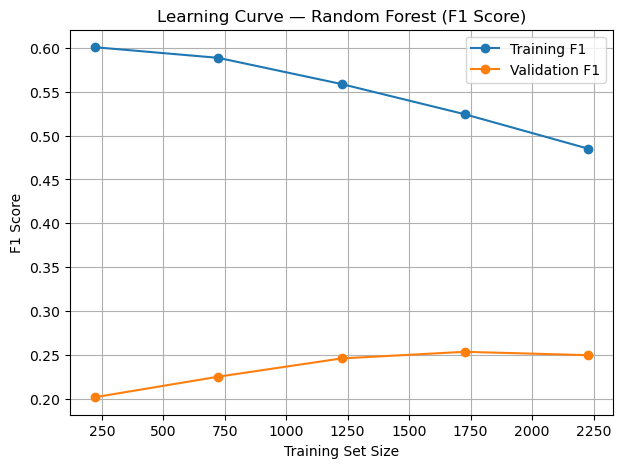

In [168]:
##Learning curve (underfitting VS overfitting)
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring="f1",          # F1 is more appropriate than accuracy for imbalance datasets
        train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, marker='o', label="Training F1")
    plt.plot(train_sizes, val_mean, marker='o', label="Validation F1")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(rf, X_train_enc, y_train, "Learning Curve — Random Forest (F1 Score)")

## Learning Curve Analysis

The learning curve plots the **F1-score** for both the **training set** and **validation set** as the training size increases, F1-score is used instead of accuracy because the dataset is **highly imbalanced**, and performance on the **stroke-positive class** is the primary concern.

### Mild Overfitting
- The **training F1-score is consistently much higher** than the validation F1-score across all training sizes
- The **gap between training and validation curves remains large**, even as more data is added
- The validation F1-score improves slightly with more data but **plateaus at a relatively low value (~0.25)**

This pattern suggests that the model is **learning complex patterns from the training data** that do not fully generalise to unseen data.

---

### What This Means for the Random Forest Model

- The model has **sufficient capacity**
- The model is **memorising training-specific patterns**, particularly from the majority class
- Stroke-related signals are present, but they are **weak and noisy**, making generalisation difficult

Importantly, this overfitting is **expected** in:
- Highly **imbalanced datasets**
- Medical risk prediction problems
- Models trained without explicit class rebalancing or threshold optimisation

---

### Logistic Regression Learning Curve

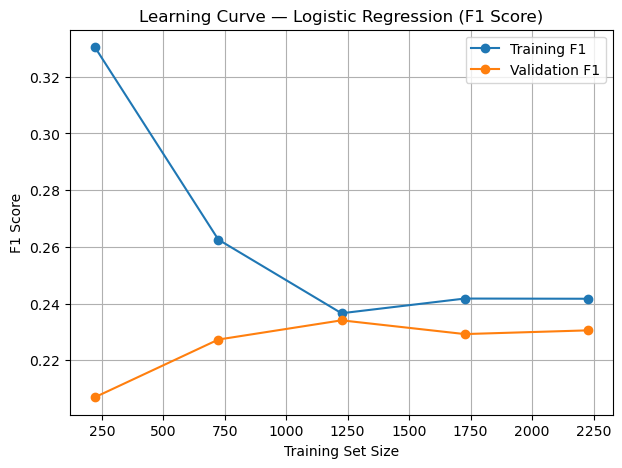

In [169]:
##Learning curve (underfitting VS overfitting)
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring="f1",          # F1 is more appropriate than accuracy for imbalance datasets
        train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, marker='o', label="Training F1")
    plt.plot(train_sizes, val_mean, marker='o', label="Validation F1")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(log_reg, X_train_enc, y_train, "Learning Curve — Logistic Regression (F1 Score)")

To further prove that I will be choosing Random Forest as my model to further improve, I created a leaning curve for Logistic Regression as well. The learning curve for Logistic Regression shows early convergence between training and validation F1 scores, indicating low variance and good generalisation. However, both curves plateau at a relatively low F1 score, suggesting underfitting. This implies that while Logistic Regression is stable and interpretable, its linear nature limits its ability to capture the non-linear relationships present in the data. In contrast, Random Forest achieves higher F1 performance despite mild overfitting, making it more suitable for this dataset after appropriate tuning.

## SMOTE and Undersampling on Random Forest model

### Rationale for Applying SMOTE and Undersampling

Based on the baseline model evaluation, I selected **Random Forest** as the primary model for further improvement. As, compared to Logistic Regression and Decision Tree, Random Forest achieved the **best overall balance between stroke detection and false positives**, with the **highest F1-score for stroke cases** and strong test accuracy, indicating better generalisation on my imbalanced data

Random Forest is also **robust to non-linearity, skewed feature distributions, and outliers**, which aligns with insights from the exploratory data analysis. These characteristics make it a suitable candidate for applying data-level imbalance handling techniques.

I only applied SMOTE and undersampling **only after selecting a strong baseline model**, rather than across all models, as applying these techniques to weaker baselines (e.g. Decision Tree) or linear models (e.g. Logistic Regression) may amplify noise and reduce precision without meaningful gains.

- **SMOTE (Oversampling)** is used to **increase recall for stroke cases** by synthetically generating minority-class samples, testing whether more stroke cases can be detected without severely degrading overall performance
- **Undersampling** is used to **reduce majority-class dominance**, testing whether improved class balance justifies the loss of majority-class information

These experiments allow a **controlled and interpretable comparison**, focusing on whether imbalance handling can further improve the Random Forest model’s ability to detect stroke cases. Even if performance does not improve, I can then analyse the results and it will definitely provide me with **valid evidence for model selection decisions**.

In [170]:
##Applying oversampling using smote and random undersampling on training data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def show_class_distribution(y, title="Class Distribution"):
    dist = y.value_counts().rename_axis("Class").reset_index(name="Count")
    dist["Percent"] = (dist["Count"] / dist["Count"].sum() * 100).round(2)
    print("\n" + title)
    print(dist)

show_class_distribution(y_train, "Before sampling (y_train)")


Before sampling (y_train)
   Class  Count  Percent
0      0   2623    94.18
1      1    162     5.82


## SMOTE

In [171]:
##SMOTE oversampling on training data
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_enc, y_train)

show_class_distribution(y_train_smote, "After SMOTE (y_train_smote)")

# Train the same model type for fair comparison
rf_smote = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf_smote_metrics, rf_smote_pred = evaluate_model(
    rf_smote,
    X_train_smote, y_train_smote,
    X_test_enc, y_test,
    model_name="Random Forest + SMOTE (Oversampling)"
)


After SMOTE (y_train_smote)
   Class  Count  Percent
0      0   2623     50.0
1      1   2623     50.0

Random Forest + SMOTE (Oversampling) — Test Results
Confusion Matrix (raw):
[[574  83]
 [ 25  15]]

Classification Report:
              precision    recall  f1-score   support

           0      0.958     0.874     0.914       657
           1      0.153     0.375     0.217        40

    accuracy                          0.845       697
   macro avg      0.556     0.624     0.566       697
weighted avg      0.912     0.845     0.874       697



## Undersampling

In [172]:
##Random undersampling on training data
undersampler = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = undersampler.fit_resample(X_train_enc, y_train)

show_class_distribution(y_train_under, "After Undersampling (y_train_under)")

rf_under = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf_under_metrics, rf_under_pred = evaluate_model(
    rf_under,
    X_train_under, y_train_under,
    X_test_enc, y_test,
    model_name="Random Forest + Random Undersampling"
)


After Undersampling (y_train_under)
   Class  Count  Percent
0      0    162     50.0
1      1    162     50.0

Random Forest + Random Undersampling — Test Results
Confusion Matrix (raw):
[[449 208]
 [  5  35]]

Classification Report:
              precision    recall  f1-score   support

           0      0.989     0.683     0.808       657
           1      0.144     0.875     0.247        40

    accuracy                          0.694       697
   macro avg      0.567     0.779     0.528       697
weighted avg      0.940     0.694     0.776       697



## Comparison table for Random Forest, Random Forest + SMOTE, Random Forest Undersampling

In [173]:
##Comparison table for randomforest,  SMOTE randomforest, and undersampling randomforest
all_metrics = [
    rf_metrics,
    rf_smote_metrics,
    rf_under_metrics
]

results_sampling_df = pd.DataFrame(all_metrics)

results_sampling_df_sorted = results_sampling_df.sort_values(
    by="Test F1 (stroke=1)", ascending=False
).reset_index(drop=True)


results_sampling_df_sorted

,Model,Train Accuracy,Test Accuracy,Test Precision (stroke=1),Test Recall (stroke=1),Test F1 (stroke=1),Test ROC-AUC
0,Random Forest (Non-linear Ensemble),0.888330,0.853659,0.190000,0.475,0.271429,0.845091
1,Random Forest + Random Undersampling,0.780864,0.694405,0.144033,0.875,0.247350,0.844406
2,Random Forest + SMOTE (Oversampling),0.923942,0.845050,0.153061,0.375,0.217391,0.790563


## Confusion matrix heatmap

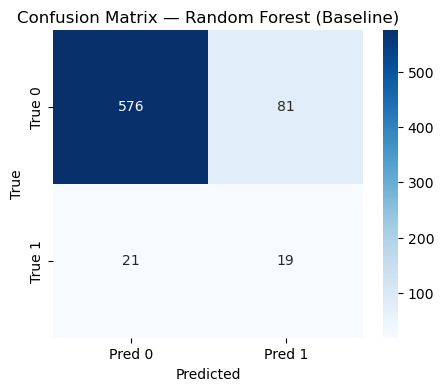

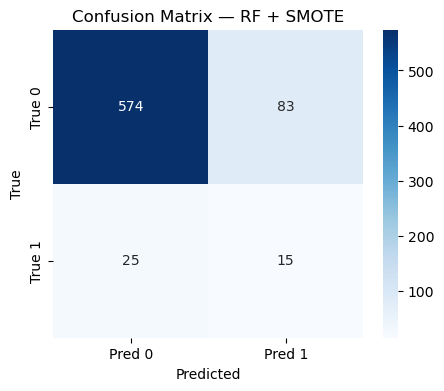

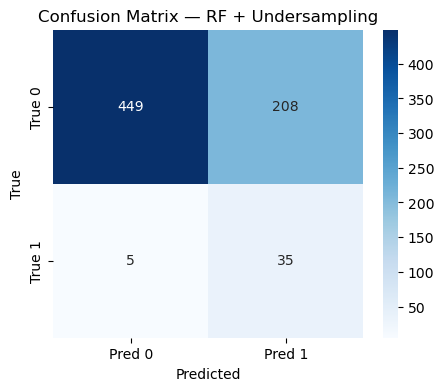

In [174]:
##Confusion matrix heatmap for each sampling method
def plot_cm_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Pred 0", "Pred 1"],
        yticklabels=["True 0", "True 1"]
    )
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_cm_heatmap(y_test, rf_pred, "Confusion Matrix — Random Forest (Baseline)")
plot_cm_heatmap(y_test, rf_smote_pred, "Confusion Matrix — RF + SMOTE")
plot_cm_heatmap(y_test, rf_under_pred, "Confusion Matrix — RF + Undersampling")

### Random Forest

The baseline Random Forest achieves the **best overall** balance between performance metrics. It records the highest test accuracy (85.4%) and the highest F1-score for stroke (0.271) among all variants. From the confusion matrix, the model correctly identifies 19 stroke cases (TP) while keeping false positives relatively low (81 FP) and although recall for stroke (47.5%) is moderate, the model maintains good precision, indicating fewer false alarms compared to sampling-based variants.

Interpretation:
This model provides a strong and stable baseline, capturing meaningful stroke patterns while preserving generalisation and avoiding excessive misclassification of non-stroke cases.

---

### Random Forest + SMOTE (Oversampling)

SMOTE balances the training data perfectly, but this **does not translate into better test performance.** While recall remains reasonable (37.5%), precision drops further (15.3%), and the stroke F1-score decreases to 0.217. The confusion matrix shows **more false negatives (25 FN)** and no meaningful gain in true positives.

Interpretation:
SMOTE likely introduces synthetic noise in a small minority class, reducing the model’s ability to generalise to real stroke cases.

---

### Random Forest + Random Undersampling

Undersampling dramatically increases **stroke recall (87.5%)**, correctly identifying **35 out of 40 stroke cases**. However, this comes at a high cost with **208 false positives**, causing accuracy to drop sharply to 69.4%. The confusion matrix highlights aggressive stroke detection but poor specificity, making the model unsuitable as false alarms of stroke positive cases are costly.

Interpretation:
Undersampling trades recall for stability, discarding valuable majority-class information and harming overall reliability.

---

### Model Selected for Further Improvement:  Random Forest
### Why this model was chosen:
  - Highest stroke F1-score
  - Best precision–recall balance
  - High test accuracy & ROC-AUC
  - Provides a stable foundation for threshold tuning later on

---

## Model Chosen: Random Forest for further Improvement

In [175]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=10,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_enc, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Threshold Tuning on Chosen Model

### Threshold Tuning Table for Comparison

In [176]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

rf_probs = rf.predict_proba(X_test_enc)[:, 1]  # P(stroke=1)

thresholds = [0.50, 0.45, 0.40, 0.35, 0.30, 0.25]

rows = []
for t in thresholds:
    y_pred_t = (rf_probs >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()

    rows.append({
        "threshold": t,
        "TN": tn, "FP": fp, "FN": fn, "TP": tp,
        "precision": precision_score(y_test, y_pred_t, zero_division=0),
        "recall": recall_score(y_test, y_pred_t, zero_division=0),
        "f1": f1_score(y_test, y_pred_t, zero_division=0),
        "accuracy": accuracy_score(y_test, y_pred_t),
        "roc_auc": roc_auc_score(y_test, rf_probs)  # AUC doesn't change with threshold
    })

threshold_table = pd.DataFrame(rows)
threshold_table

,threshold,TN,FP,FN,TP,precision,recall,f1,accuracy,roc_auc
0,0.50,576,81,21,19,0.190000,0.475,0.271429,0.853659,0.845091
1,0.45,545,112,13,27,0.194245,0.675,0.301676,0.820660,0.845091
2,0.40,524,133,8,32,0.193939,0.800,0.312195,0.797704,0.845091
3,0.35,500,157,7,33,0.173684,0.825,0.286957,0.764706,0.845091
4,0.30,459,198,4,36,0.153846,0.900,0.262774,0.710187,0.845091
5,0.25,410,247,3,37,0.130282,0.925,0.228395,0.641320,0.845091


**Threshold Selection Rationale**

Given the **clinical importance of detecting stroke cases**, i performed threshold tuning to prioritise **recall for the minority class (stroke = 1)** while maintaining reasonable precision.

I ended up choosing a threshold of **0.40** as the final operating point because it:
- Achieves **high recall (0.80)**, correctly identifying **32 out of 40 stroke cases**
- Produces the **highest F1-score (0.312)**, indicating the best balance between recall and precision
- Avoids the excessive false positives observed at lower thresholds (e.g. 0.30)

This threshold provides a **practical trade-off** between sensitivity and reliability, making it suitable for a **stroke risk screening scenario**.

## Chosen Threshold: 0.40

Random Forest — Final Threshold = 0.4
Confusion Matrix:
[[524 133]
 [  8  32]]

Classification Report:
              precision    recall  f1-score   support

           0      0.985     0.798     0.881       657
           1      0.194     0.800     0.312        40

    accuracy                          0.798       697
   macro avg      0.589     0.799     0.597       697
weighted avg      0.940     0.798     0.849       697



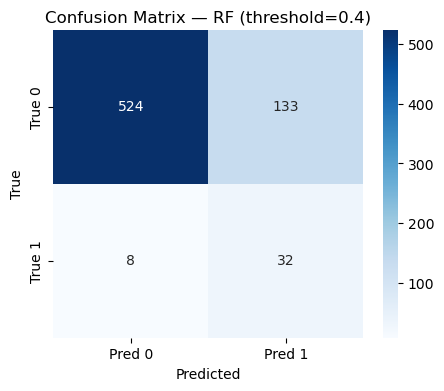

In [177]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

final_threshold = 0.40
rf_pred_final = (rf_probs >= final_threshold).astype(int)

print(f"Random Forest — Final Threshold = {final_threshold}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred_final))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred_final, digits=3, zero_division=0))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, rf_pred_final)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0","Pred 1"],
            yticklabels=["True 0","True 1"])
plt.title(f"Confusion Matrix — RF (threshold={final_threshold})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Handling Overfitting for Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Train a more regularised RF
rf_reg = RandomForestClassifier(
    n_estimators=400,
    max_depth=6,              # shallower trees
    min_samples_leaf=20,      # larger leaves
    min_samples_split=40,     # prevent tiny splits
    max_features="sqrt",      # reduce correlation between trees
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train_enc, y_train)

#Predict probabilities and apply same final threshold
rf_reg_probs = rf_reg.predict_proba(X_test_enc)[:, 1]
rf_reg_pred  = (rf_reg_probs >= final_threshold).astype(int)

print(f"\nRegularised RF — Threshold = {final_threshold}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_reg_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_reg_pred, digits=3, zero_division=0))

#Create a simple comparison table (baseline vs regularised)
def metric_row(name, y_true, y_pred, y_prob):
    return {
        "Model": name,
        "Threshold": final_threshold,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (stroke=1)": precision_score(y_true, y_pred, zero_division=0),
        "Recall (stroke=1)": recall_score(y_true, y_pred, zero_division=0),
        "F1 (stroke=1)": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

comparison_overfit = pd.DataFrame([
    metric_row("RF Baseline", y_test, rf_pred_final, rf_probs),
    metric_row("RF Regularised", y_test, rf_reg_pred, rf_reg_probs)
])

comparison_overfit


Regularised RF — Threshold = 0.4
Confusion Matrix:
[[446 211]
 [  4  36]]

Classification Report:
              precision    recall  f1-score   support

           0      0.991     0.679     0.806       657
           1      0.146     0.900     0.251        40

    accuracy                          0.692       697
   macro avg      0.568     0.789     0.528       697
weighted avg      0.943     0.692     0.774       697



,Model,Threshold,Accuracy,Precision (stroke=1),Recall (stroke=1),F1 (stroke=1),ROC-AUC
0,RF Baseline,0.4,0.797704,0.193939,0.8,0.312195,0.845091
1,RF Regularised,0.4,0.691535,0.145749,0.9,0.250871,0.846499


### Regularisation Decision for Random Forest

Although a more **regularised Random Forest** was evaluated to address potential overfitting, I will **not be selecting it as the final model**.

While the regularised model achieved **higher recall (stroke = 1)**, this came at the cost of:
- **Lower precision**, resulting in a higher number of false positives
- **Reduced F1-score**, indicating poorer balance between recall and precision
- **Significantly lower accuracy**

Given the **imbalanced nature of the dataset**, I prioritiesed the **F1-score for the stroke class** as the primary evaluation metric.

The **baseline Random Forest with a tuned decision threshold (0.40)** achieved:
- The **highest F1-score** for stroke detection
- A **better precision–recall trade-off**
- Strong overall generalisation performance

Therefore, I will retain the baseline Random Forest for further use, as it provides a **more balanced and reliable decision boundary** aligned with the project’s objectives.

## Predict on New Data

In [192]:
##Create new patient data
new_patient = pd.DataFrame([{
    "gender": "Male",
    "age": 65,
    "hypertension": 0,
    "heart_disease": 1,
    "ever_married": "No",
    "work_type": "Private",
    "Residence_type": "Urban",
    "avg_glucose_level": 100.0,
    "bmi": 20.5,
    "smoking_status": "formerly smoked"
}])

if not float(new_patient.loc[0, "age"]).is_integer():
    print("Warning: age is non-integer. Model was trained on integer ages only.")
if new_patient.loc[0, "gender"] == "Other":
    print("Warning: gender='Other' was removed during training.")
if new_patient.loc[0, "work_type"] in ["children", "Never_worked"]:
    print("Warning: this work_type was removed during training.")
if new_patient.loc[0, "smoking_status"] == "Unknown":
    print("Warning: smoking_status='Unknown' was removed during training.")

##Apply same preprocessing as training
new_patient_enc = pd.get_dummies(new_patient, columns=categorical_cols, drop_first=True)
new_patient_enc = new_patient_enc.reindex(columns=X_train_enc.columns, fill_value=0)
bmi_median_train = X_train["bmi"].median()
new_patient_enc["bmi"] = new_patient_enc["bmi"].fillna(bmi_median_train)
new_patient_enc["avg_glucose_level"] = new_patient_enc["avg_glucose_level"].clip(upper=glucose_cap)

##Final model chosen
model_final = rf

##Predict probability
prob = model_final.predict_proba(new_patient_enc)[:, 1][0]
pred = int(prob >= final_threshold)

print("Predicted stroke risk probability:", round(prob, 4))
print("Predicted class (0=no stroke, 1=stroke):", pred)
print("Threshold used:", final_threshold)

Predicted stroke risk probability: 0.3166
Predicted class (0=no stroke, 1=stroke): 0
Threshold used: 0.4


## Final Model Selection Rationale

The **Random Forest classifier** was selected as the final model for stroke risk prediction based on a balanced consideration of **performance**, **robustness**, and **practical deployment needs**.

From a **performance** perspective, Random Forest achieved the **highest F1-score for the minority class (stroke = 1)** among all baseline models. Unlike accuracy, which is inflated by the majority non-stroke class, the F1-score provides a more meaningful evaluation for this **highly imbalanced dataset**. Random Forest also demonstrated strong **ROC-AUC**, indicating good overall discrimination between stroke and non-stroke cases.

In terms of **model behaviour**, Random Forest is well-suited to this dataset as it can capture **non-linear relationships**, handle **skewed numerical features**, and remain **robust to outliers**, all of which were identified during exploratory data analysis. Compared to Logistic Regression, which assumes linear decision boundaries, Random Forest better models the complex interactions between age, glucose levels, BMI, and medical conditions.

While Random Forest is less interpretable than a single decision tree, it still provides **feature importance measures**, allowing clinicians and stakeholders to understand which factors contribute most to stroke risk. This offers a practical balance between **predictive power and interpretability**.

From a **deployment perspective**, Random Forest is stable, widely supported, and does not require extensive feature scaling or strict distributional assumptions. Threshold tuning further allows the model to be adjusted based on clinical priorities, such as **prioritising recall to reduce missed stroke cases**.

Overall, Random Forest provides the **best trade-off between predictive performance, clinical relevance, and deployment practicality**, making it the most suitable final model for this project.

## Iterative model development


In [180]:
## Further feature engineering / feature selection